# Распознавание лиц при помощи SVM и kernel trick

# Описание набора данных

В этом задании вам предлагается построить классификатор, обученный на изображениях лиц. Сначала загрузим необходимый набор данных и посмотрим, что он из себя представляет. 

Таблица содержит "распрямленные" представления изображений лиц людей.

Изначально каждое изображение — матрица размера $62 \times 47$, значения которой, предположительно, нормированы к диапазону $[0, 1]$ из диапазона $[0, 255] \cap \mathbb Z$. Сами значения отвечают за интенсивность пикселя: чем значение больше, тем пиксель светлее.

Обратите внимание, из картинки (или, что то же самое, матрицы) размера $62 \times 47$ получился вектор длины $2914 = 62 \cdot 47$.

Колонка <code>label</code> отвечает за имя человека, изображенного на картинке.

In [67]:
import pandas as pd

data = pd.read_csv('persons_pics_train.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,label
0,0.379085,0.312418,0.352941,0.445752,0.466667,0.473203,0.484967,0.513725,0.545098,0.571242,...,0.597386,0.620915,0.732026,0.852288,0.921569,0.937255,0.941176,0.950327,0.946405,John Ashcroft
1,0.450980,0.466667,0.512418,0.509804,0.450980,0.458824,0.516340,0.571242,0.607843,0.618301,...,0.430065,0.453595,0.679739,0.934640,0.985621,0.981699,0.963399,0.938562,0.874510,Ariel Sharon
2,0.589542,0.614379,0.688889,0.729412,0.738562,0.775163,0.789543,0.806536,0.820915,0.837908,...,0.733333,0.854902,0.937255,0.624837,0.128105,0.082353,0.107190,0.095425,0.100654,Colin Powell
3,0.390850,0.432680,0.499346,0.562091,0.597386,0.644444,0.670588,0.650980,0.637908,0.639216,...,0.713726,0.898039,0.968627,0.959477,0.832680,0.443137,0.266667,0.303268,0.313725,Jean Chretien
4,0.645752,0.626144,0.605229,0.585621,0.602614,0.664052,0.701961,0.709804,0.733333,0.771242,...,0.115033,0.129412,0.132026,0.129412,0.155556,0.171242,0.167320,0.176471,0.183007,Colin Powell


Убедимся в том, что перед нами действительно изображения лиц людей. Возьмем первые $15$ строк из таблицы исходных данных и построим соответствующие им изображения.

In [68]:
import matplotlib.pyplot as plt

def get_img_by_row(row):
  return row.drop('label').astype(float).to_numpy().reshape(62,47), row['label']

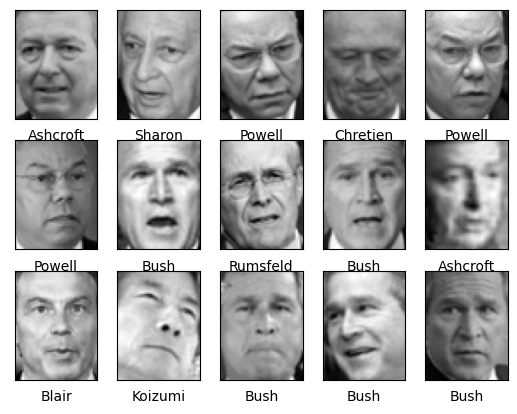

In [69]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])
plt.savefig('persons_pics_img_for_description.png', dpi = 300, bbox_inches='tight')    

Крупнее

(-0.5, 46.5, 61.5, -0.5)

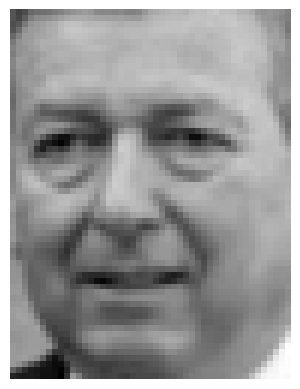

In [8]:
plt.imshow(df.iloc[0].drop('label').astype(float).to_numpy().reshape(62,47), cmap='gray')
plt.axis('off')

# Немного озорства

Определите число различных людей, фотографии которых содержатся в рассматриваемом наборе данных.

(array([110., 201.,  47., 451., 103., 122.,  51.,  93.,  60.,  88.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

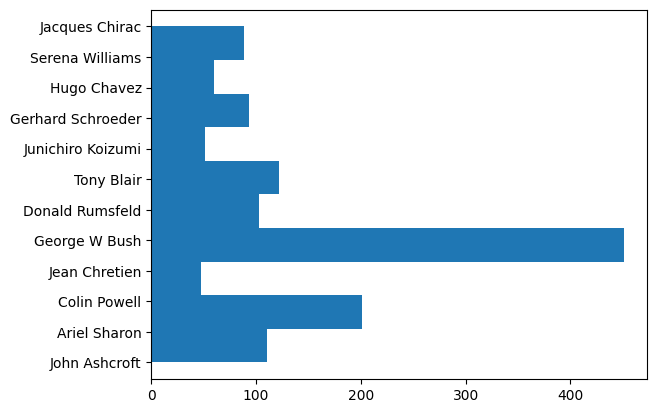

In [82]:
ppl = data['label']
len(set(ppl))
plt.hist(ppl, orientation='horizontal')

Постройте гистограмму распределения объектов по классам и вычислите долю объектов каждого класса. 

In [83]:
tot = 0
GS = 0
for i in range(len(ppl)):
    tot += 1
    if ppl[i] == 'Gerhard Schroeder':
        GS += 1
GS/tot

0.07013574660633484

На основе имеющихся данных поставьте в соответствие каждому человеку один вектор, координаты которого являются средним соответствующих координат всех векторов, отождествленных с этим человеком.

In [173]:
import numpy as np

means = pd.DataFrame([],columns=list(set(data['label'])))
arr = np.array(data)
arrN = np.array(np.array([arr[i][:len(arr[0])-1:] for i in range(len(arr))]))
names = [arr[i][len(arr[i])-1] for i in range(len(arr))]
# vec = np.zeros(len(arrN[0]))
vec = 0*arrN[0]
tot = 0
for j in range(len(means.columns)):
    col = means.columns[j]
    for i in range(len(arr)):
        if arr[i][-1] == col:
            tot += 1
            vec += arrN[i]
    vec /= tot
    means = means.drop(col, axis=1)
    means.insert(j,col,vec)
    vec = 0*arrN[0]
    tot = 0

Вычислите координату с индексом $0$ усредненного вектора, соответствующего человеку из вашего индивидуального задания.

In [174]:
means['Junichiro Koizumi'][0]

0.26838396082352944

Используя усредненные векторы, постройте изображения всех людей из набора данных.

Serena Williams


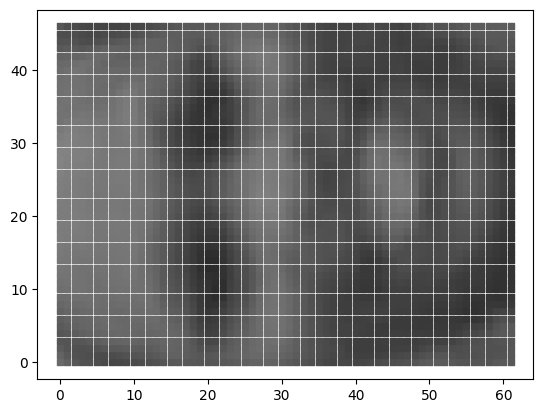

Hugo Chavez


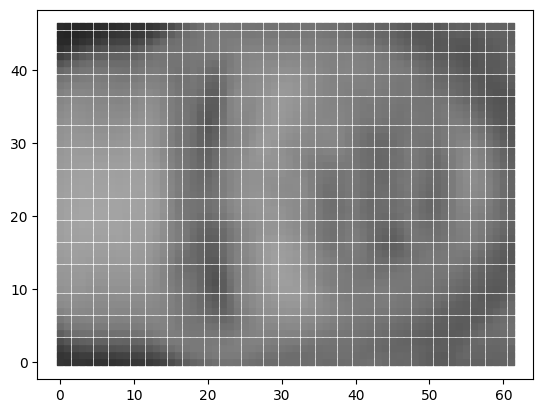

Tony Blair


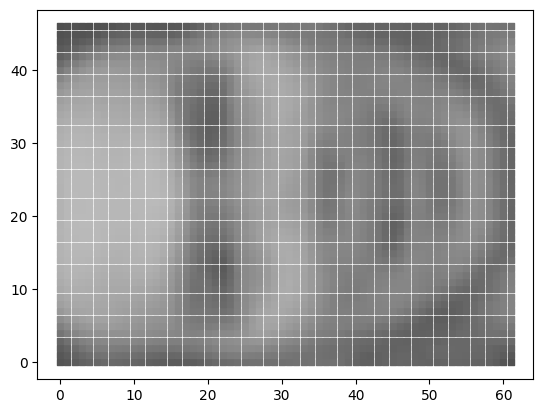

John Ashcroft


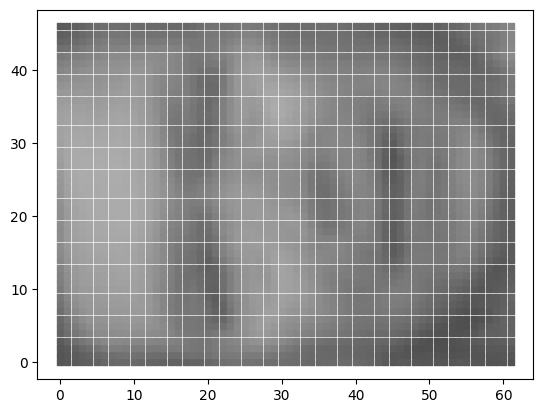

George W Bush


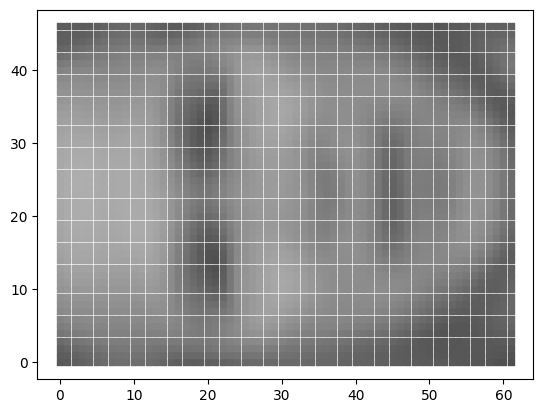

Colin Powell


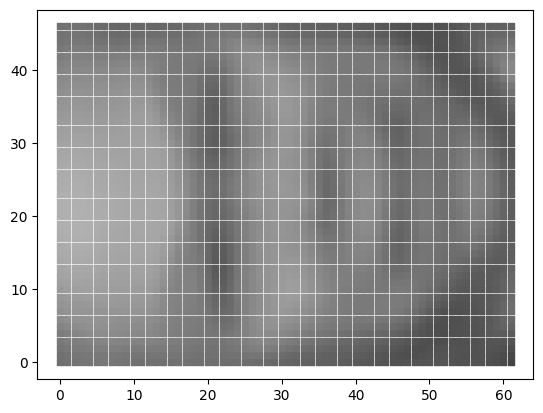

Gerhard Schroeder


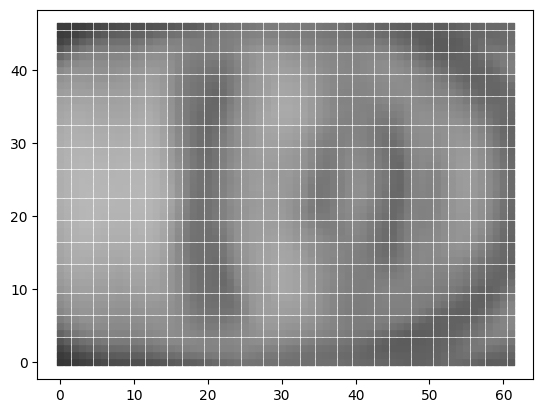

Junichiro Koizumi


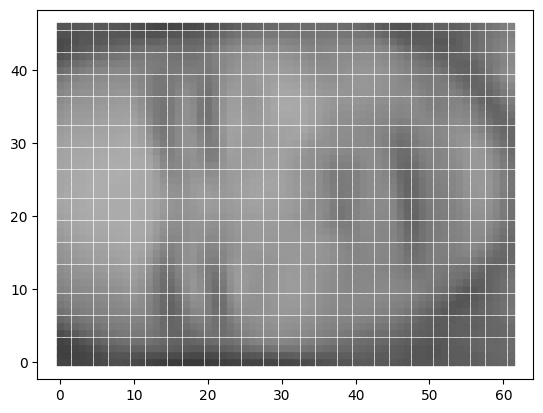

Jean Chretien


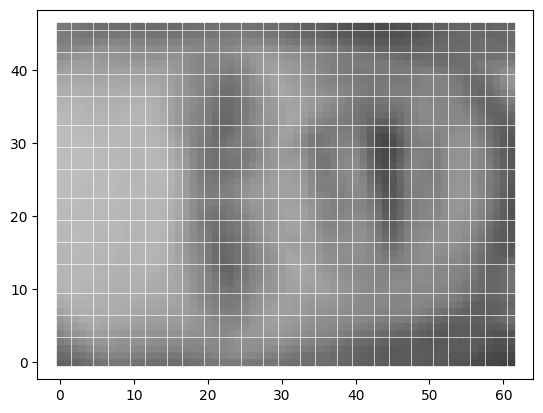

Donald Rumsfeld


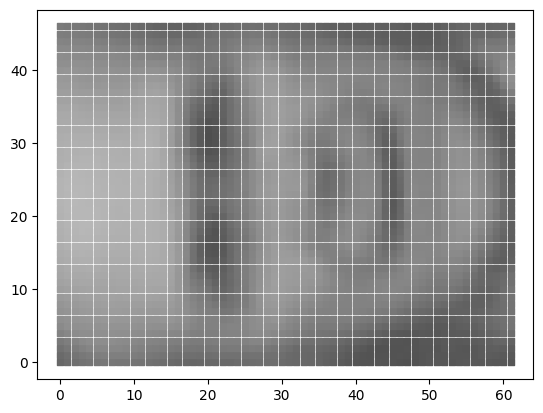

Ariel Sharon


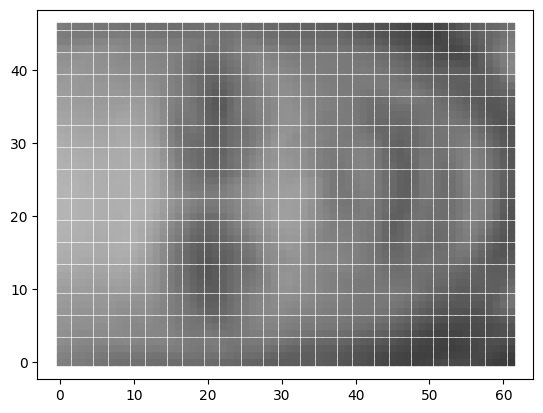

Jacques Chirac


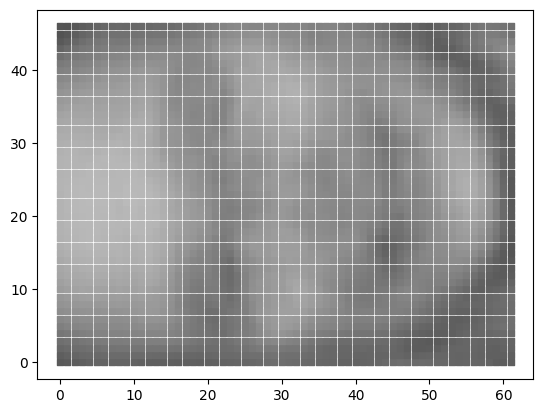

In [179]:
for i in range(len(means.columns)):
    name = means.columns[i]
    vec = np.array(means[name])
    mat = vec.reshape(62, 47)

    for i in range(len(mat)):
        for j in range(len(mat[0])):
            plt.scatter([i],[j],marker='s',color=(mat[i][j],mat[i][j],mat[i][j]), s=13)
    print(name)
    plt.show()

В качестве меры "схожести" двух объектов часто используют так называемое [косинусное сходство](https://en.wikipedia.org/wiki/Cosine_similarity). Не следует путать с косинусным расстоянием.

Постройте матрицу "схожести" объектов на основе их усредненных векторов. Для визуализации рекомендуем использовать тепловую карту, например, [из библиотеки seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [ ]:
# < ENTER YOUR CODE HERE > 

Определите косинусное сходство для пары людей из вашего индивидуального задания на основе соответствующих им "усредненных" векторов.

In [183]:
v1 = np.array(means['Jacques Chirac'])
v2 = np.array(means['Junichiro Koizumi'])
np.dot((v1.T),v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

0.9947457960456934

# Построение модели

При помощи <code>train_test_split()</code> разделите набор данных на тренировочный и тестовый с параметрами, указанными в вашем индивидуальном задании. Используйте стратификацию по колонке <code>label</code>.

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score

X_train, X_test, Y_train, Y_test = train_test_split(data.drop('label',axis=1), data['label'], test_size=0.2, random_state=11, stratify = data['label'])

svc = SVC(kernel='linear', random_state=11)
svc.fit(X_train, Y_train)
ans = svc.predict(X_test)
f1_score(Y_test, ans, average='weighted')

0.7838258158689967

## Первое приближение: базовый SVM классификатор с линейным ядром.

Обучите модель <code>SVC()</code> на тренировочном наборе данных с параметрами, указанными в вашем индивидуальном задании.

In [ ]:
# < ENTER YOUR CODE HERE > 

Оцените модель на тестовых данных. Вычислите <code>f1_score(average='weighted')</code>

In [ ]:
# < ENTER YOUR CODE HERE > 

В целом, достаточно неплохой результат, но имеет смысл попробовать подобрать параметры.

## Подбор гиперпараметров

Используя <code>GridSearchCV()</code>, осуществите подбор гиперпараметров, указанных в вашем задании. Отдельно обратите внимание на время обучения моделей

In [231]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[11]}]


cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)

cv.fit(X_train, Y_train)

cv.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.807 total time=   0.5s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.792 total time=   0.5s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.769 total time=   0.5s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.797 total time=   0.5s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.764 total time=   0.5s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.349 total time=   0.6s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.358 total time=   0.6s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.368 total time=   0.7s
[CV 4/5] END C=1, class_weight=N

{'C': 100,
 'class_weight': 'balanced',
 'gamma': 0.001,
 'kernel': 'rbf',
 'random_state': 11}

Определите гиперпараметры лучшей полученной модели.

In [ ]:
# < ENTER YOUR CODE HERE > 

Выполните предсказание для тестовых данных при помощи лучшей полученной модели. Вычислите <code>f1_score(average='weighted')</code>.

In [232]:
svc = SVC(C = 100, gamma = 0.001, kernel='rbf', random_state=11, class_weight = 'balanced')
svc.fit(X_train, Y_train)
ans = svc.predict(X_test)
f1_score(Y_test, ans, average='weighted')

0.8104755950985177

## Уменьшение размерности

Обучение было долгим. Имеет смысл проверить, что будет если уменьшить размерность входных данных, например, при помощи <code>PCA</code>. Обучите модель <code>PCA(svd_solver='full')</code> на тренировочных данных и определите минимальное количество компонент, необходимое для того, чтобы уровень объясненной дисперсии был больше <code>0.95</code>.

In [270]:
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

pca = PCA(n_components=172, svd_solver='full')
pca.fit(X_train)
X_trainPCA = pca.transform(X_train)
X_testPCA = pca.transform(X_test)
#EVR = pca.explained_variance_ratio_
#n = 172
#s = 0
#for i in range(n):
#    s += EVR[i]
#s

cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(X_trainPCA, Y_train)
cv.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.788 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.783 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.722 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.783 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.717 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.340 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.344 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.340 total time=   0.0s
[CV 4/5] END C=1, class_weight=N

{'C': 100,
 'class_weight': None,
 'gamma': 0.001,
 'kernel': 'rbf',
 'random_state': 11}

Заново обучите модель <code>PCA(svd_solver='full')</code> на тренировочных данных с использованием полученного числа ГК. Примените полученное преобразование для тренировочных и тестовых данных.

In [ ]:
# < ENTER YOUR CODE HERE > 

Для полученных после <code>PCA</code> данных аналогично проделанному ранее, то есть используя <code>GridSearchCV()</code>, осуществите подбор гиперпараметров, указанных в вашем задании. Отдельно обратите внимание на время обучения моделей.

In [ ]:
# < ENTER YOUR CODE HERE > 

Определите гиперпараметры лучшей полученной модели.

In [ ]:
# < ENTER YOUR CODE HERE > 

Выполните предсказание для тестовых данных при помощи лучшей полученной модели. Вычислите <code>f1_score(average='weighted')</code>

In [272]:
svc = SVC(C = 100, gamma = 0.001, kernel='rbf', random_state=11, class_weight = None)
svc.fit(X_trainPCA, Y_train)
ans = svc.predict(X_testPCA)
f1_score(Y_test, ans, average='weighted')

0.8100342068273005

Видно, что качество модели изменилось незначительно, при этом время обучения существенно сократилось.

In [282]:
data = pd.read_csv('persons_pics_train.csv')
test = pd.read_csv('persons_pics_reserved.csv')
dataX = data.drop('label', axis=1)

svc = SVC(C = 100, gamma = 0.001, kernel='rbf', random_state=11, class_weight = 'balanced')
svc.fit(dataX, data['label'])
svc.predict(test)

array(['George W Bush', 'Ariel Sharon', 'Tony Blair', 'Jacques Chirac',
       'Tony Blair', 'Colin Powell', 'Donald Rumsfeld', 'Colin Powell',
       'Tony Blair', 'Gerhard Schroeder', 'Donald Rumsfeld',
       'Hugo Chavez', 'George W Bush', 'Hugo Chavez', 'Colin Powell',
       'George W Bush', 'Ariel Sharon', 'Colin Powell', 'John Ashcroft',
       'Gerhard Schroeder', 'Ariel Sharon', 'Donald Rumsfeld',
       'Colin Powell', 'George W Bush', 'George W Bush',
       'Donald Rumsfeld', 'Donald Rumsfeld', 'Tony Blair',
       'Serena Williams', 'Jean Chretien', 'George W Bush',
       'George W Bush', 'George W Bush', 'George W Bush', 'George W Bush',
       'Colin Powell', 'Donald Rumsfeld', 'Jacques Chirac',
       'George W Bush', 'Gerhard Schroeder', 'Colin Powell',
       'Donald Rumsfeld', 'Gerhard Schroeder', 'George W Bush',
       'Tony Blair', 'George W Bush', 'George W Bush', 'Tony Blair',
       'Colin Powell', 'Tony Blair', 'Serena Williams', 'Jean Chretien',
       'Ton